# PARTE A - EDA

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime
import seaborn as sns
# import plotly.express as px

#Extras
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_2017 = pd.read_csv('/Users/juanchi/Documents/Data Science/Curso/Proyecto 3/flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('/Users/juanchi/Documents/Data Science/Curso/Proyecto 3/flujo-vehicular-2018.csv', sep =',')
data_2019 = pd.read_csv('/Users/juanchi/Documents/Data Science/Curso/Proyecto 3/flujo-vehicular-2019.csv', sep =',')

In [3]:
print(data_2019.info())
print(data_2018.info())
print(data_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  obj

Los 3 datasets están todos completos sin datos faltantes. Los tres comparten las mismas columnas. 

In [4]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


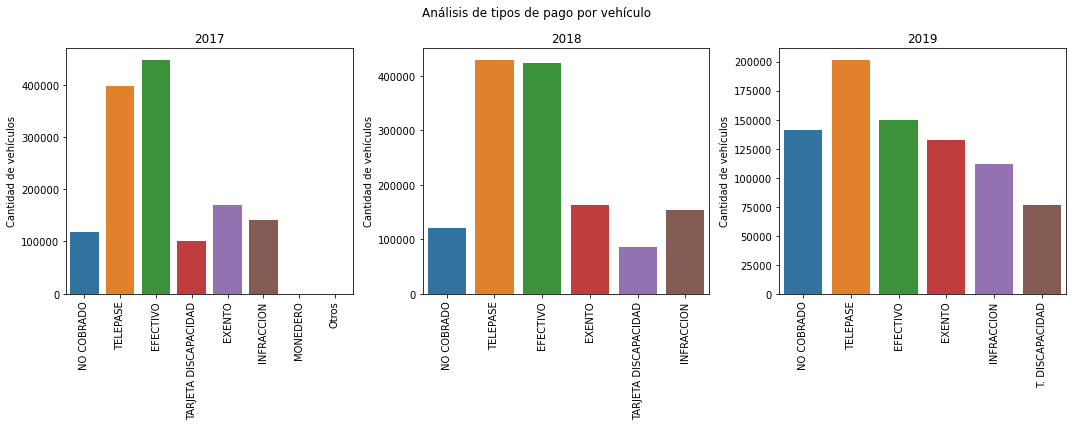

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Análisis de tipos de pago')

l2 = sns.countplot(x="forma_pago", data=data_2017, ax=axs[0])
l2.set(xlabel = None, ylabel = 'Cantidad de vehículos')
l2.set_xticklabels(l2.get_xticklabels(),rotation=90)
l2.set_title('2017')

l3 = sns.countplot(x="forma_pago", data=data_2018, ax=axs[1])
l3.set(xlabel = None, ylabel = 'Cantidad de vehículos')
l3.set_xticklabels(l3.get_xticklabels(),rotation=90)
l3.set_title('2018')

l4 = sns.countplot(x="forma_pago", data=data_2019, ax=axs[2])
l4.set(xlabel = None, ylabel = 'Cantidad de vehículos')
l4.set_xticklabels(l4.get_xticklabels(),rotation=90)
l4.set_title('2019')

plt.tight_layout()
plt.show()

Los dos métodos de pago más utilizados son efectivo y telepase. En el año 2019 hay un -100% de vehículos que pasan con el sistema de pago Efectivo y Telepase.

Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Filtrado:Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo** y **Telepase**


In [6]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
df_original = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo

df = df_original[(df_original.forma_pago == 'EFECTIVO') & (df_original.estacion == 'Illia')]

# Crearemos un DF extra de TELEPASE para análisis posteriores, ya que al ser usuario real y conociendo el la estación Illia es probable que el método de pago TELEPASE vs. EFECTIVO tengan correlacción.
df2 = df_original[(df_original.forma_pago == 'TELEPASE') & (df_original.estacion == 'Illia')] 

# Para análisis posteriores, ya que al ser usuario del Peaje de la estación Illia es probable que el métod

df.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)
df2.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)


df.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
86,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
88,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
94,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
149,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769


Vamos a unir la fecha con la hora para tener un sistema de tiempo unificado. 

In [7]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora

df['fecha_hora'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')
df2['fecha_hora'] = pd.to_datetime(df2.fecha) + pd.to_timedelta(df2.hora_fin, unit = 'h') # Para análisis posteriores.
df.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha_hora
80,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00
86,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
88,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00
94,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
149,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00


In [8]:
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df.drop(columns=['fecha','hora_fin'], inplace = True)
df.reset_index(drop=True, inplace = True)

df2.drop(columns=['fecha','hora_fin'], inplace = True) # Para análisis posteriores.
df2.reset_index(drop=True, inplace = True) # Para análisis posteriores.

df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha_hora
0,Martes,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00
1,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
2,Martes,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00
3,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
4,Martes,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00


In [9]:
df.sort_values('fecha_hora', inplace = True)
df2.sort_values('fecha_hora', inplace = True) # Para análisis posteriores.

df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha_hora
134867,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01
134864,Domingo,Provincia,Liviano,EFECTIVO,9,2017-01-01
134865,Domingo,Provincia,Liviano,EFECTIVO,644,2017-01-01
134866,Domingo,Provincia,Pesado,EFECTIVO,6,2017-01-01
134868,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01


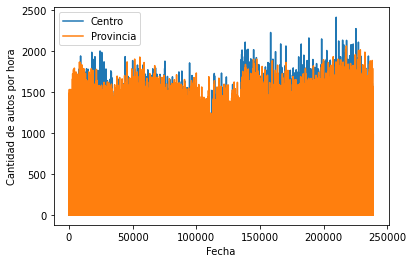

In [10]:
df.groupby('sentido')['cantidad_pasos'].plot(legend=True)

plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos por hora')
plt.show()

La visualización no es la ideal ya que suma los pasaje por horario, haciendo que sea poco legible. Con el resampleo a continuación vamos a ir visualizando de una mejor manera. 

### 2. Resampleo

In [11]:
# Capital / Provincia

df_centro = df[df.sentido=='Centro']
df_prov = df[df.sentido=='Provincia']

# Dia

df_dia = df.resample('D', on='fecha_hora').sum()
df_centro_dia = df_centro.resample('D', on='fecha_hora').sum()
df_prov_dia = df_prov.resample('D', on='fecha_hora').sum()

df_dia2 = df2.resample('D', on='fecha_hora').sum() # Para análisis posteriores.

# Semana

df_semana = df.resample('W', on = 'fecha_hora').sum()
df_centro_semana = df_centro.resample('W', on='fecha_hora').sum()
df_prov_semana = df_prov.resample('W', on='fecha_hora').sum()

# Mes

df_mes = df.resample('M', on = 'fecha_hora').sum()
df_centro_mes = df_centro.resample('M', on='fecha_hora').sum()
df_prov_mes = df_prov.resample('M', on='fecha_hora').sum()

print(df_dia.head())
print(df_semana.head())
print(df_mes.head())

            cantidad_pasos
fecha_hora                
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
            cantidad_pasos
fecha_hora                
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413
2017-01-22          357215
2017-01-29          354581
            cantidad_pasos
fecha_hora                
2017-01-31         1565260
2017-02-28         1363113
2017-03-31         1451214
2017-04-30         1373985
2017-05-31         1407136


In [12]:
df_dia['dias'] = df_dia.index.day_name()
df_dia.head()

,cantidad_pasos,dias
fecha_hora,,
2017-01-01,31183,Sunday
2017-01-02,51568,Monday
2017-01-03,51093,Tuesday
2017-01-04,53332,Wednesday
2017-01-05,56486,Thursday


### 3. Visualización

In [13]:
# Función graficar

def graficar (dataset, dataset_prov, dataset_centro, titulo):
    
    plt.figure(figsize = (20,6))
    plt.plot(dataset.index,dataset.cantidad_pasos,linewidth=0.8, label='Flujo Total')
    plt.plot(dataset_centro.index.values,dataset_centro.cantidad_pasos,linewidth=0.5, linestyle='-',c='green', label='hacia Capital Federal')
    plt.plot(dataset_prov.index.values,dataset_prov.cantidad_pasos,linewidth=0.5, linestyle='-',c='red', label='hacia Provincia BsAS')
    plt.xlabel('Tiempo')
    plt.title(titulo)
    plt.ylabel('Cantidad de vehículos')
    plt.legend()
    
    return plt.show()

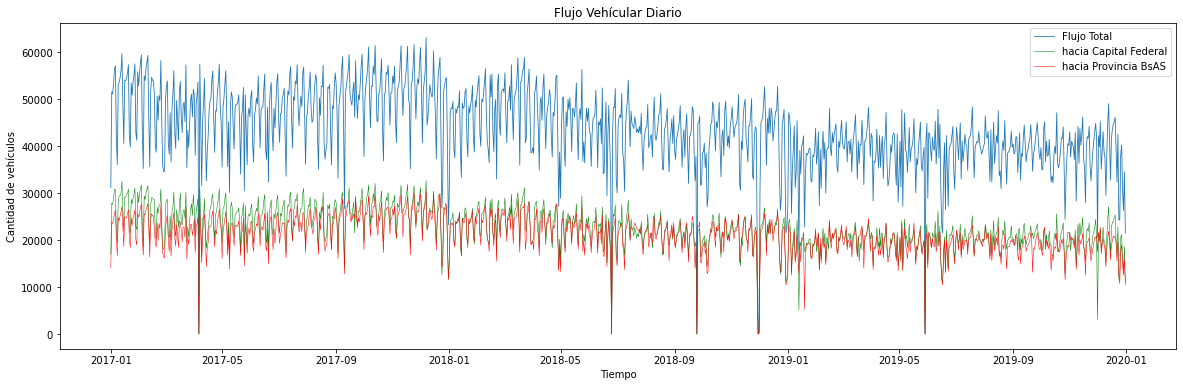

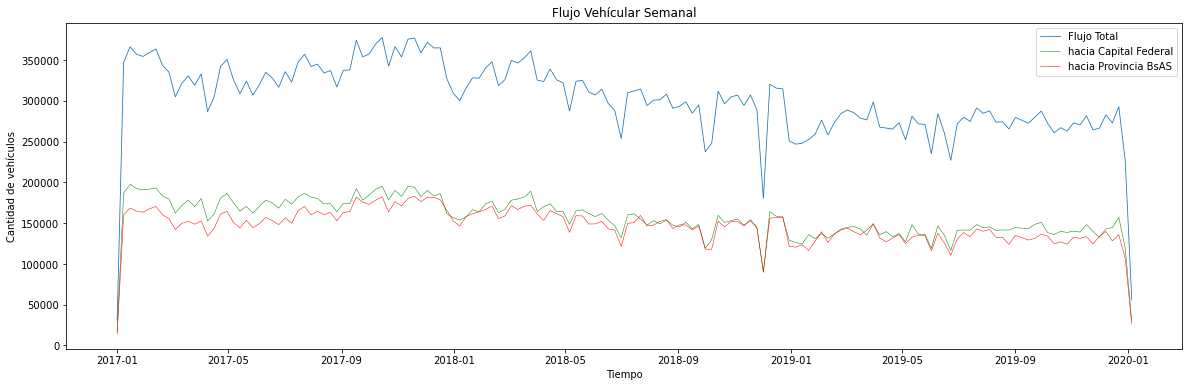

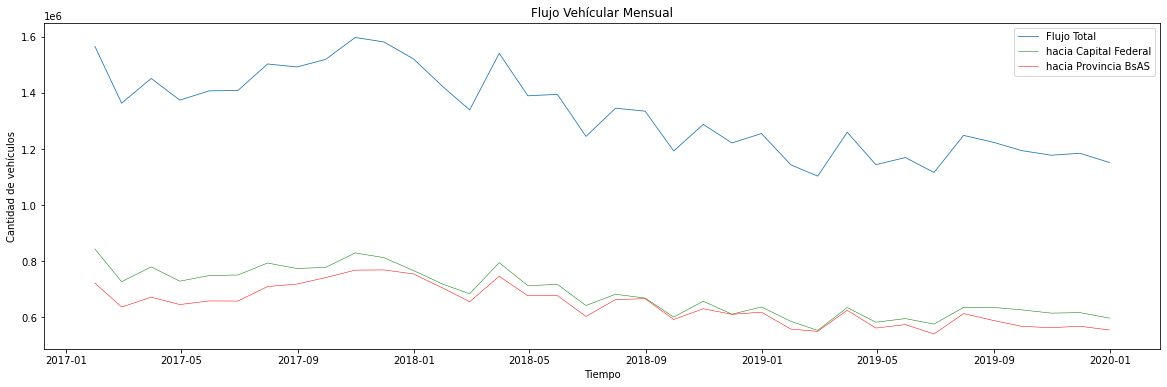

In [14]:
graficar (df_dia, df_prov_dia, df_centro_dia, "Flujo Vehícular Diario")
graficar (df_semana, df_prov_semana, df_centro_semana, "Flujo Vehícular Semanal")
graficar (df_mes, df_prov_mes, df_centro_mes, "Flujo Vehícular Mensual")

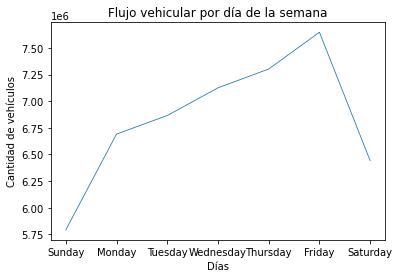

In [15]:
diario = df_dia.groupby(['dias'],sort=False).sum()
plt.plot(diario.index,diario.cantidad_pasos,linewidth=0.8)
plt.xlabel('Días')
plt.ylabel('Cantidad de vehículos')
plt.title('Flujo vehicular por día de la semana')
plt.show()

Vemos que los viernes son los dias con mayor volumen de vehículos y los domingo la menor cantidad. 

### 4. Outliers

En los gráficos anteriores podemos ver que a lo largo de los 3 años hay días donde los pases de vehículos son prácticamente cero. Esto se debe a días donde se han hecho los paros generales por parte de los gremios (6 durante el mandato de Mauricio Macri 2015-2019). También, podemos ver que el evento del G20 del 30 de noviembre al 1 de diciembre de 2018 donde durante 2 días el tránsito de la ciudad de Buenos Aires estuvo cortado en casi su totalidad, afectando fuertemente la zona centro y portuaria donde se encuentra el peaje Illia. 

Vamos a limitar estos outliers en `df_dia` (Serie diaria) para que no afecten en los análisis de tendencias y estacionalidad. Vamos a tomar como outlier cualquier valor por debajo de 15.000 pases vehiculares. Luego imputaremos un nuevo valor con la media del pases del día en cuestión sabiendo que los días se comportan distinos.

In [16]:
df_dia.cantidad_pasos[df_dia.cantidad_pasos <= 15000] = np.nan
#df_dia2.cantidad_pasos[df_dia2.cantidad_pasos <= 15000] = np.nan
df_dia = df_dia.interpolate()
#df_dia2 = df_dia2.interpolate()

In [17]:
df_dia.to_csv('dataset_dia.csv', index=True)

### 5. Descomposición de la serie: Ruido, Tendencia y Estacionalidad

Vamos a analizar la tendencía con dos ventanas móviles por día en bins semanales y mensuales.

In [18]:
ventana_semanal = df_dia['cantidad_pasos'].rolling(window = 7, center = True).mean()
ventana_mensual = df_dia['cantidad_pasos'].rolling(window = 30, center = True).mean()

In [19]:
ventana_semanal

fecha_hora
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

Tendencia con ajuste lineal

In [20]:
from sklearn.linear_model import LinearRegression

df_dia['fecha_numeros']=df_dia.index.map(datetime.datetime.toordinal)
df_dia2['fecha_numeros']=df_dia.index.map(datetime.datetime.toordinal)

lr = LinearRegression()
lr.fit(df_dia.fecha_numeros.values.reshape(-1, 1), df_dia.cantidad_pasos)

lr2 = LinearRegression()
lr2.fit(df_dia2.fecha_numeros.values.reshape(-1, 1), df_dia2.cantidad_pasos)

LinearRegression()

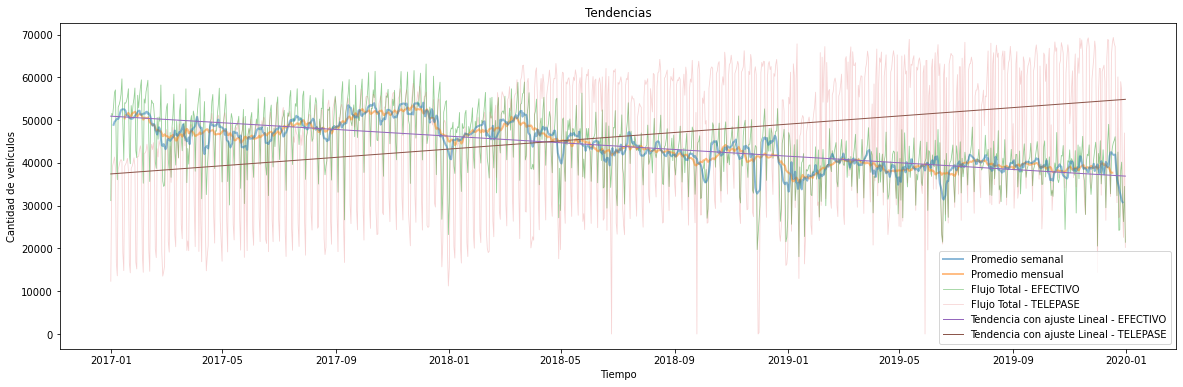

In [21]:
plt.figure(figsize = (20,6))
plt.plot(ventana_semanal,linewidth=2, label='Promedio semanal', zorder=2, alpha=0.5)
plt.plot(ventana_mensual,linewidth=2, label='Promedio mensual', zorder=1, alpha=0.5)
plt.plot(df_dia.index,df_dia.cantidad_pasos,linewidth=0.8, label='Flujo Total - EFECTIVO', zorder=0, alpha=0.5)
plt.plot(df_dia2.index,df_dia2.cantidad_pasos,linewidth=0.8, label='Flujo Total - TELEPASE', zorder=0, alpha=0.2)
plt.plot(df_dia.index, lr.predict(df_dia.fecha_numeros.values.reshape(-1, 1)), lw = 1, label = 'Tendencia con ajuste Lineal - EFECTIVO')
plt.plot(df_dia2.index, lr2.predict(df_dia2.fecha_numeros.values.reshape(-1, 1)), lw = 1, label = 'Tendencia con ajuste Lineal - TELEPASE')
plt.xlabel('Tiempo')
plt.title('Tendencias')
plt.ylabel('Cantidad de vehículos')
plt.legend()
    
plt.show()

Podemos ver que la tendencia del flujo de vehículos que pagan con Efectivo (Dinero en mano) está bajando por la adopción de sistemas de sensores automáticos y porque desde el Gobierno de la Ciudad de Buenos Aires que administra el peaje ha venido fomentando fuertemente el paso a la modalidad TELEPASE. Por eso decimos que esta serie de tiempo es no-estacionaria en la media.

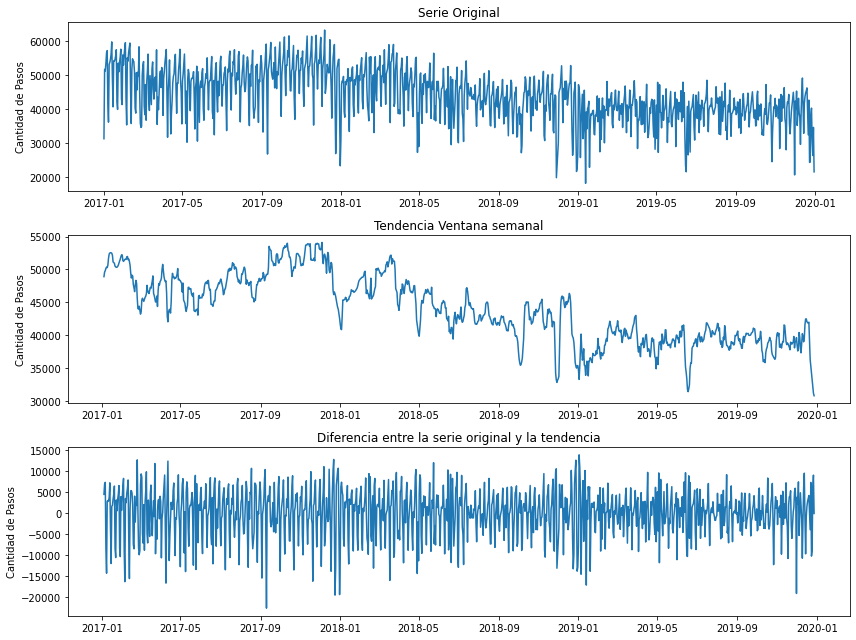

In [22]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(df_dia.index, df_dia.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Ventana semanal')
plt.plot(ventana_semanal)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(df_dia.index, df_dia.cantidad_pasos - ventana_semanal)
plt.ylabel('Cantidad de Pasos')

plt.tight_layout()
plt.show()

Una forma común de interpretar las componentes es parándose en la tendencia y diferenciar el aporte de cada día de la semana. Por ejemplo, podríamos decir que el promedio pases de vehículos usando efectivo en el peaje de la autopista Illia en Buenos Aires está en el orden de los 50.000, con una componente estacional del orden de -10.000 pases los días domingos y del orden de +10.000 pases los días viernes. Este mismo análisis se puede hacer con otras herramientas como Statmodels. 

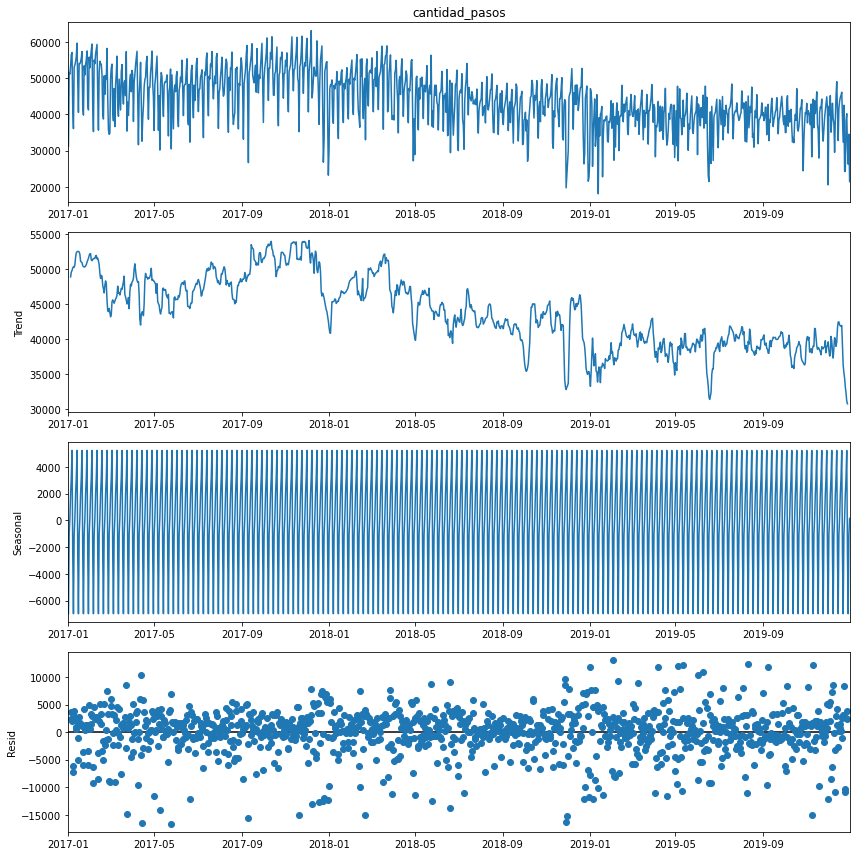

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_dia.cantidad_pasos, model='additive') # Usa un modelo adaptativo por como se estudia la estacionanlidad

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

<AxesSubplot:>

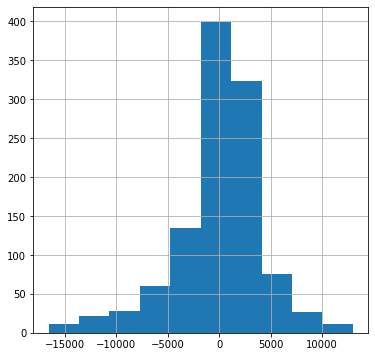

In [24]:
# También podemos ver la distribución del residuo.
matplotlib.rcParams['figure.figsize'] = [6,6]
result.resid.hist()

In [25]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_dia['cantidad_pasos'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.752326
p-value                           0.404374
#Lags Used                       20.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
dtype: float64


Por último, además de un test visual se pueden generar distintos test que indican si la serie es o no estacionaria. En este test de ADF, el `Test Statistics` es mayor a los `Critical Values` en 1%, 5% y 10%. Por lo tanto, podemos considerar que según este test, y además de nuestra observación, la serie de tiempo elegida en este proyecto en __non-stationary__. Nuestra serie de tiempo tiene una tendencia a la baja marcada. La mayoría de los modelos estadísticos requieren que la serie sea estacionaria para realizar predicciones precisas y efectivas.

### 6. Análisis de autocorrelación

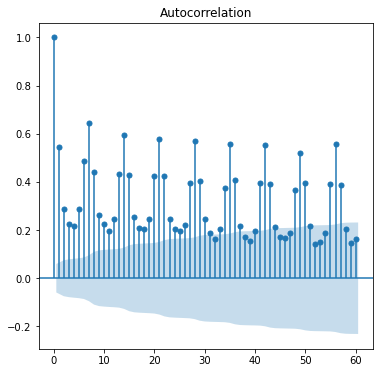

In [26]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

nlags =  60
autocorr = acf(df_dia.cantidad_pasos, nlags = nlags, )
plot_acf(df_dia.cantidad_pasos, lags = nlags)
plt.show()

Cuando vemos la correclación notamos que con +60 días hay una autocorrelación aproximada del 60%. Eso técnicamente es que en la serie hay mucha persistencia del pasado lejano que esta impactando nuestro presente. Si bien la correlacción va disminuyendo, es bastante constante para nuestro modelo de predicción en el próximo paso. 

# PARTE B - Modelo de Machine Learning


### 7. Predicción a Futuro: One-Step Prediction

Vamos a entrenar un `RandomForestRegressor` para predecir el tráfico en la autopista Illia para el último trimestre del 2019. Utilizaremos 2017, 2018 y 2019 para hacerlo. 

In [27]:
df_dia_pred = df_dia.cantidad_pasos
df_dia_pred.head()

fecha_hora
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [28]:
# Definimos X e y
look_back = 120

N = df_dia_pred.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

for i in range(X.shape[0]):
    X[i,:] = df_dia_pred.iloc[i:i+look_back]
    y[i] = df_dia_pred.iloc[i+look_back]
    
#print(X)
#print(y)

(974, 120) (974,)


Test Train Split

In [29]:
N_train = int(y.shape[0]*0.7) # cantidad de instancias que vamos a usar para entrenar.
N_test =  int(y.shape[0]*0.3) #cantidad de puntos que vamos a usar para evaluar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(681, 120) (681,)
(292, 120) (292,)


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

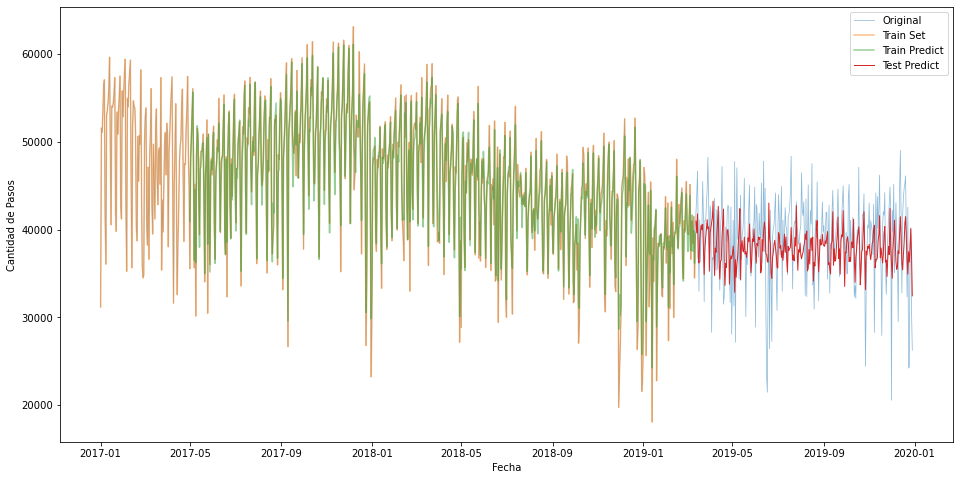

In [31]:
plt.figure(figsize=(16,8))
plt.plot(df_dia_pred.index[:length_total], df_dia_pred[:length_total],lw = 0.75, zorder=0, alpha=0.5, label = 'Original')
plt.plot(df_dia_pred.index[:N_train + look_back], df_dia_pred[:N_train + look_back], alpha=0.5, label = 'Train Set')
plt.plot(df_dia_pred.index[look_back: look_back + N_train], y_train_pred,alpha=0.5, label = 'Train Predict')
plt.plot(df_dia_pred.index[N_train+look_back: length_total], y_test_pred, lw = 1, label = 'Test Predict')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [32]:
RMSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(RMSE))

RMSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(RMSE))

Error en Train: 1801.3716847269202
Error en Test: 4815.512436008603


El modelo incial que usamos nos arroja un error de 1801 en conjuntos de datos de Train y de 4815 en el de test. Antes de comparar con un modelo de benchmark vamos a ver si optimizando los parámetros del modelo como el ```look_back``` podemos mejorar un poco. 

In [33]:
look_back = 60

N = df_dia_pred.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

for i in range(X.shape[0]):
    X[i,:] = df_dia_pred.iloc[i:i+look_back]
    y[i] = df_dia_pred.iloc[i+look_back]

N_train = int(y.shape[0]*0.7) # cantidad de instancias que vamos a usar para entrenar.
N_test =  int(y.shape[0]*0.3) #cantidad de puntos que vamos a usar para evaluar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(RMSE))

RMSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(RMSE))

(1034, 60) (1034,)
(723, 60) (723,)
(310, 60) (310,)
Error en Train: 1832.9911335748664
Error en Test: 4684.293320425089


Bajando la cantidad de días a la mitad que tomamos atrás para predecir podemos bajar mínimamente el RMSE de Test. Ahora, vamos a comparar el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior como modelo benchmark.

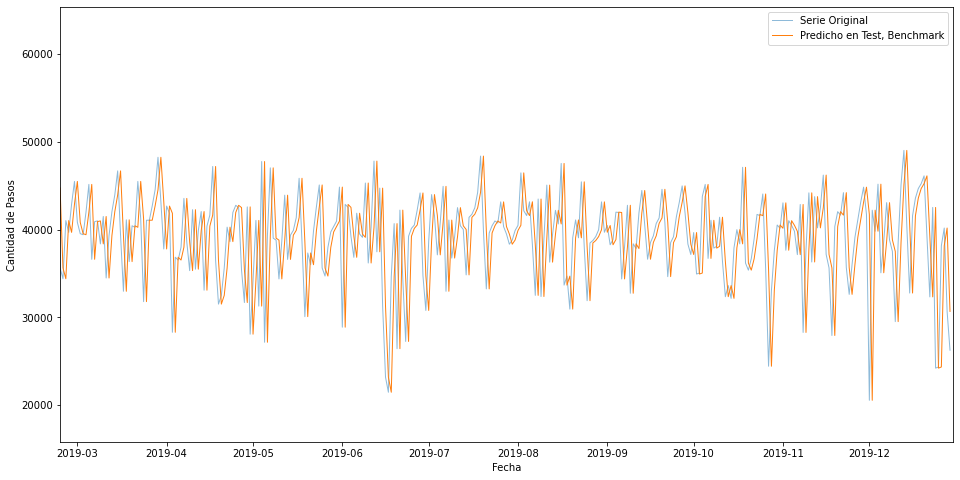

In [34]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

plt.figure(figsize=(16,8))
plt.plot(df_dia_pred.index[:length_total], df_dia_pred[:length_total],lw = 1, alpha=0.5, label = 'Serie Original')
plt.plot(df_dia_pred.index[N_train+look_back: length_total], y_test_pred_benchmark, lw = 1, label = 'Predicho en Test, Benchmark')
plt.xlim(df_dia_pred.index[N_train+look_back], df_dia_pred.index[length_total])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

In [35]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
RMSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(RMSE))

6271.223032566578


Por lo que parece que, el modelo inicial mejora la predicción por sobre el benchmark en el conjunto de test.

# PARTE C - Investigación


1. __¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?__

Sabemos que el modelado de series de tiempo con una sola variable es el enfoque más utilizado __(Univariate time series)__. Se asume que el único factor que influye sobre la predicción a futuro son los valores anteriores. 

Según nuestro EDA es importante sumar a nuestro modelo la variable del día. Hay una varianza marca en los días de una semana siendo los viernes el pico superior de pases y los domingo el pico inferior que creemos que puede afectar mucho al resultado de la predicción. 

Para incorporar más variables al modelo se puede trabajar con otra técnica muy utilizado que se llama __Vector Auto Regression (VAR)__. VAR es capaz de comprender y utilizar la relación entre varias variables __(Multivariate Time Series)__. Sin embargo, para poder trabajar con VAR debemos hacer que nuestra serie de tiempo sea estacionaria. Sabemos por nuestro análisis previo que hay una fuerte tendencia a la baja año a año de `cantidad_pasos` con el método `efectivo`. Por lo tanto, para poder implementar esta técnica deberíamos quitar la tendencia y trabajar con el residual. 

Otra forma puede ser trabajando con la herramient Prophet de Facebook que según la documentación sólo soporta Univariate time series, pero se puede agregarle regresores que puede sumarle información al modelo. 

Para lograrlo agregaría la columna día al análisis y pasaría luego mediante __get_dummies__ a que sea una variable númerica.

2. __¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?__

Vamos a ver si la tendencia a la baja que teníamos en el __Peaje Illia (Norte)__  se extendie a los Peajes __Avellaneda (Sur Oeste)__ y __Dellepiane (Oeste)__ que son otros de los grandes puntos de acceso hacia la Capital Federal y salida de la misma.  

In [36]:
df_original2 = pd.concat([data_2019, data_2018, data_2017])

estacion_filter = ['Dellepiane', 'Dellepiane Centro', 'Dellepiane Liniers']

df3 = df_original2[(df_original2.forma_pago == 'EFECTIVO') & (df_original2.estacion.isin(estacion_filter))]
df4 = df_original2[(df_original2.forma_pago == 'EFECTIVO') & (df_original2.estacion == 'Avellaneda')]

def prepro (dataset):

    dataset['fecha_hora'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
    dataset.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)
    dataset.drop(columns=['fecha','hora_fin'], inplace = True)
    dataset.sort_values('fecha_hora', inplace = True)
    dataset.reset_index(drop=True, inplace = True)
    
    return #dataset.head()

In [37]:
prepro (df3)
prepro (df4)

In [38]:
df_dia_df3 = df3.resample('D', on='fecha_hora').sum()
df_dia_df4 = df4.resample('D', on='fecha_hora').sum()

In [39]:
df_dia_df3.cantidad_pasos[df_dia_df3.cantidad_pasos <= 15000] = np.nan
df_dia_df3 = df_dia_df3.interpolate()
df_dia_df4.cantidad_pasos[df_dia_df4.cantidad_pasos <= 15000] = np.nan
df_dia_df4 = df_dia_df4.interpolate()

In [40]:
ventana_mensual1 = df_dia_df3['cantidad_pasos'].rolling(window = 30, center = True).mean()
ventana_mensual2 = df_dia_df4['cantidad_pasos'].rolling(window = 30, center = True).mean()

from sklearn.linear_model import LinearRegression

df_dia_df3['fecha_numeros']=df_dia_df3.index.map(datetime.datetime.toordinal)
df_dia_df4['fecha_numeros']=df_dia_df4.index.map(datetime.datetime.toordinal)

lr3 = LinearRegression()
lr3.fit(df_dia_df3.fecha_numeros.values.reshape(-1, 1), df_dia_df3.cantidad_pasos)

lr4 = LinearRegression()
lr4.fit(df_dia_df4.fecha_numeros.values.reshape(-1, 1), df_dia_df4.cantidad_pasos)

LinearRegression()

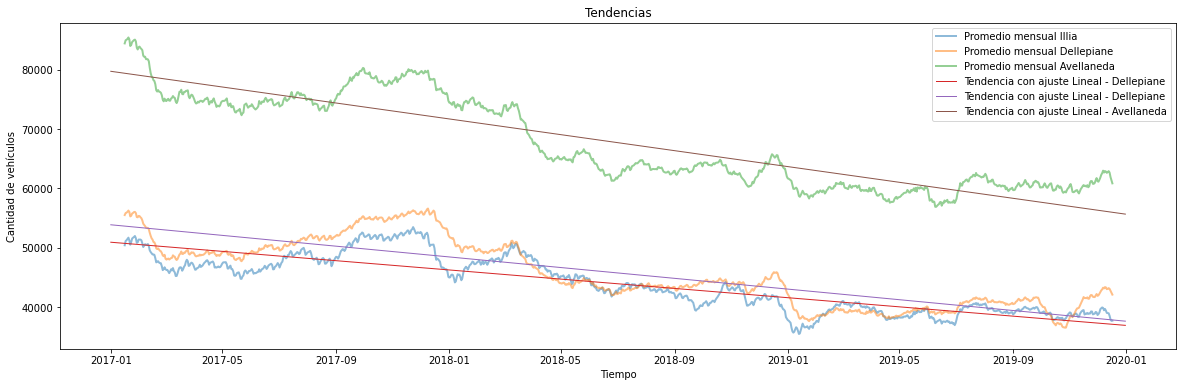

In [41]:
plt.figure(figsize = (20,6))
plt.plot(ventana_mensual,linewidth=2, label='Promedio mensual Illia', zorder=1, alpha=0.5)
plt.plot(ventana_mensual1,linewidth=2, label='Promedio mensual Dellepiane', zorder=1, alpha=0.5)
plt.plot(ventana_mensual2,linewidth=2, label='Promedio mensual Avellaneda', zorder=1, alpha=0.5)
plt.plot(df_dia.index, lr.predict(df_dia.fecha_numeros.values.reshape(-1, 1)), lw = 1, label = 'Tendencia con ajuste Lineal - Dellepiane')
plt.plot(df_dia_df3.index, lr3.predict(df_dia_df3.fecha_numeros.values.reshape(-1, 1)), lw = 1, label = 'Tendencia con ajuste Lineal - Dellepiane')
plt.plot(df_dia_df4.index, lr4.predict(df_dia_df4.fecha_numeros.values.reshape(-1, 1)), lw = 1, label = 'Tendencia con ajuste Lineal - Avellaneda')
plt.xlabel('Tiempo')
plt.title('Tendencias')
plt.ylabel('Cantidad de vehículos')
plt.legend()
    
plt.show()

Las distintas estaciones de peaje que cumplen la función de acceso y salida de la Capital Federal y Provincia de Buenos Aires tienen un mismo comportamiento de baja en su modalidad de pago __Efectivo__. Esto tiene una explicación en el fomento al la modalidad __Telepase__ o __Tag (2020)__. Podemos notar, sin embargo, que el peaje __Avellaneda__ presenta un volumen de pasos más alta con relación a sus pares. Al mismo tiempo, es importante saber que el dataset no presenta datos del peaje __Peajes Dock Sud y Hudson (Sur)__ que es otro acceso importante. Esto se debe a que el peaje está ubicado físicamente en la Provincia de Buenos Aires, que es otra jurisdicción. 

Las estaciones __Alberdi__, __Salguero__, __Retiro__ y __Sarmiento__ hay que analizarlas por separado ya que son estaciones que cumplen otra funcionalidad. Son accesos secundarios a las grandes autopistas. Ninguna presenta la modalidad de pago __Efectivo__. 